In [11]:
import rospy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bagpy import bagreader
from scipy.spatial.transform import Rotation as R

In [4]:
r = R.from_quat([.5, .5, .5, .5])

In [5]:
r.as_euler('zxy', degrees=True)

array([90.,  0., 90.])

In [518]:
b = bagreader('../data/raw/yaw_bags/yaw_30.bag')

"""
imu_data = b.message_by_topic('/razor/imu')
df_imu = pd.read_csv(imu_data)
df_imu.to_csv(os.path.join(outdir,'imu_data.csv'))
"""

[INFO]  Data folder ../data/raw/yaw_bags/yaw_30 already exists. Not creating.


"\nimu_data = b.message_by_topic('/razor/imu')\ndf_imu = pd.read_csv(imu_data)\ndf_imu.to_csv(os.path.join(outdir,'imu_data.csv'))\n"

In [519]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/razor/imu,sensor_msgs/Imu,995,49.879935


In [520]:
imu_data = b.message_by_topic('/razor/imu')
imu_yaw = b.message_by_topic('/razor/yaw')
df_imu = pd.read_csv(imu_data)

No data on the topic:/razor/yaw


In [499]:
df_yaw_test = pd.read_csv(imu_yaw)

In [521]:
df_imu.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,1.614727e+09,13717,1614727016,76102733,base_imu_link,-0.026120,0.064141,0.291501,0.954060,0.0025,...,9.652781,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
1,1.614727e+09,13718,1614727016,96288204,base_imu_link,-0.026384,0.064153,0.291350,0.954098,0.0025,...,9.629032,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
2,1.614727e+09,13719,1614727016,116506338,base_imu_link,-0.026710,0.064326,0.291364,0.954073,0.0025,...,9.662357,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
3,1.614727e+09,13720,1614727016,136442899,base_imu_link,-0.027059,0.064490,0.291710,0.953947,0.0025,...,9.724794,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04
4,1.614727e+09,13721,1614727016,156556844,base_imu_link,-0.027152,0.064733,0.291956,0.953852,0.0025,...,9.825152,0.04,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.04


In [500]:
df_yaw_test.head()

,Time,data
0,1.614725e+09,85.23
1,1.614725e+09,85.30
2,1.614725e+09,85.23
3,1.614725e+09,85.22
4,1.614725e+09,85.25


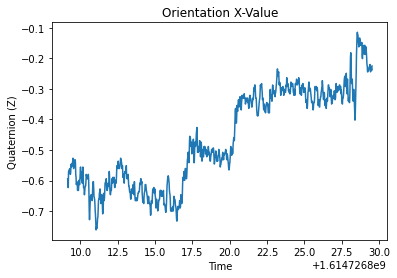

In [411]:
plt.plot(df_imu['Time'], df_imu['linear_acceleration.x'])
plt.title('Orientation X-Value')
plt.xlabel('Time')
plt.ylabel('Quaternion (Z)')
plt.show()

In [522]:
quat = np.array([df_imu['orientation.x'], df_imu['orientation.y'], df_imu['orientation.y'], df_imu['orientation.z']])

In [523]:
len(quat[0])

995

In [524]:
quat = quat.reshape(len(quat[0]), 4)

In [525]:
q = R.from_quat(quat)

In [526]:
q = q.as_euler('xyz', degrees=True)

In [527]:
df = pd.DataFrame(q)

In [528]:
df.head()

,0,1,2
0,88.636657,0.659002,89.901169
1,91.299235,-0.589696,90.032070
2,89.726420,0.073309,89.591024
3,90.639528,-0.390112,90.102506
4,88.788394,0.429186,89.781563


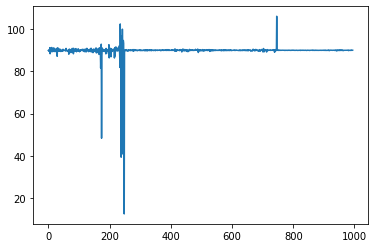

In [529]:
plt.plot(df[2])

In [121]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

In [530]:
temp1 = [euler_from_quaternion(arr[0], arr[1], arr[2], arr[3]) for arr in quat]
temp1[:10]

[(0.0028308265859006104, 3.2480443801687444e-05, 0.002831800907747141),
 (0.002863798280186071, -2.9397196108734645e-05, 0.0028643528168161565),
 (0.0026942627579454436, 3.438072584609737e-06, 0.0026942076811513936),
 (0.002677622093543331, -1.8183443644580235e-05, 0.0026777174102060926),
 (0.0027233986815915607, 2.0350909813123264e-05, 0.002724116529857286),
 (0.0029022845860274256, -2.7077796516685594e-05, 0.002901803400937337),
 (0.002374398528127721, -1.9713413306765388e-05, 0.0023732429895229803),
 (0.0024975208640627138, -2.2188908840788452e-06, 0.0024975146237923218),
 (0.0023810259627128783, -6.222003845230109e-06, 0.0023808804166144297),
 (0.0027995481617201666, 0.00010281861785622695, 0.0028083567862709526)]

In [531]:
yaw_array = [t[2] for t in temp1]

In [532]:
yaw_array

[0.002831800907747141,
 0.0028643528168161565,
 0.0026942076811513936,
 0.0026777174102060926,
 0.002724116529857286,
 0.002901803400937337,
 0.0023732429895229803,
 0.0024975146237923218,
 0.0023808804166144297,
 0.0028083567862709526,
 0.0031781092634006144,
 0.002749125908124244,
 0.0019918304239749016,
 0.0018806559373352408,
 0.002186874615241526,
 0.0022245336504540044,
 0.0022984845613583244,
 0.002151576016681474,
 0.0024645363515735453,
 0.0022049509330220665,
 0.001811519106189027,
 0.001963797641874353,
 0.00215051414125394,
 0.002405711055181549,
 0.0023750624792246186,
 0.002432718915877513,
 0.002350483399008914,
 0.002076672279545832,
 0.0011434094524056697,
 0.0009974110377244008,
 0.0019955103877299027,
 0.0028126038501205286,
 0.0027228962247107234,
 0.0021598598517436583,
 0.0020115753975383124,
 0.0024727575264476866,
 0.002672848478592035,
 0.002537192409863325,
 0.0026703869986166033,
 0.0027918581127441733,
 0.0027648724168690543,
 0.0025296152064381043,
 0.00256

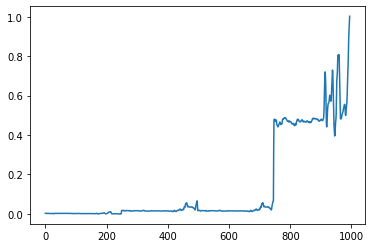

In [533]:
plt.plot(yaw_array)

In [534]:
yaw_deg = [x*180/math.pi for x in yaw_array]

In [535]:
yaw_deg

[0.1622502404352266,
 0.16411532743997478,
 0.15436672926170306,
 0.1534219063335101,
 0.156080380062646,
 0.16626108785041807,
 0.135976807058677,
 0.14309704721550362,
 0.13641439939735595,
 0.16090699122024896,
 0.18209224762428605,
 0.1575133118855889,
 0.11412347679951523,
 0.10775364792552912,
 0.1252986857776352,
 0.1274563895558448,
 0.13169346464181028,
 0.12327622505741766,
 0.14120753140173417,
 0.12633438249559747,
 0.10379239929194245,
 0.11251731669714393,
 0.12321538407705132,
 0.13783709018986665,
 0.1360810561394484,
 0.13938452662142264,
 0.13467277857877505,
 0.11898455704978807,
 0.06551253587820945,
 0.05714744290137191,
 0.11433432319143794,
 0.16115033005415227,
 0.15601046172802988,
 0.12375085384466333,
 0.11525478045129607,
 0.14167857002466147,
 0.15314293710128676,
 0.14537041689779506,
 0.15300190468733857,
 0.1599616868596003,
 0.15841552037873238,
 0.14493627512101784,
 0.14716317996839823,
 0.15764269615046253,
 0.15456373747579533,
 0.14042343867287918,

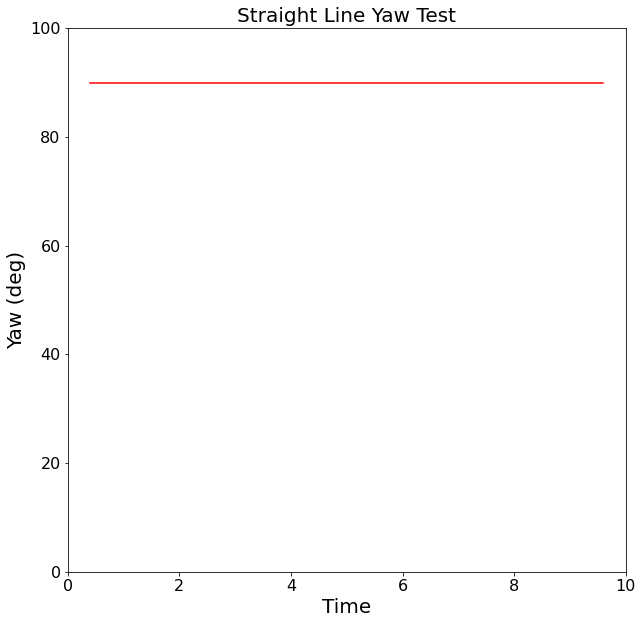

In [540]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(df_imu['Time'][0:550]-9, yaw_deg[0:550], color='blue')
#plt.plot(df_yaw_test['data'])
plt.axhline(y=90, color='red', xmin=0.04, xmax=0.96)
plt.title('Straight Line Yaw Test', fontsize=20)

plt.xlabel('Time', fontsize=20)
plt.ylabel('Yaw (deg)', fontsize=20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_xticklabels(labels=['0', '2', '4', '6', '8', '10'])

plt.ylim(0,100)

plt.show()

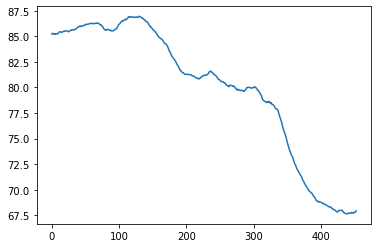

In [502]:
plt.plot(df_yaw_test['data'])

In [404]:
df_imu['Time'] 

0      1.614727e+09
1      1.614727e+09
2      1.614727e+09
3      1.614727e+09
4      1.614727e+09
5      1.614727e+09
6      1.614727e+09
7      1.614727e+09
8      1.614727e+09
9      1.614727e+09
10     1.614727e+09
11     1.614727e+09
12     1.614727e+09
13     1.614727e+09
14     1.614727e+09
15     1.614727e+09
16     1.614727e+09
17     1.614727e+09
18     1.614727e+09
19     1.614727e+09
20     1.614727e+09
21     1.614727e+09
22     1.614727e+09
23     1.614727e+09
24     1.614727e+09
25     1.614727e+09
26     1.614727e+09
27     1.614727e+09
28     1.614727e+09
29     1.614727e+09
           ...     
765    1.614727e+09
766    1.614727e+09
767    1.614727e+09
768    1.614727e+09
769    1.614727e+09
770    1.614727e+09
771    1.614727e+09
772    1.614727e+09
773    1.614727e+09
774    1.614727e+09
775    1.614727e+09
776    1.614727e+09
777    1.614727e+09
778    1.614727e+09
779    1.614727e+09
780    1.614727e+09
781    1.614727e+09
782    1.614727e+09
783    1.614727e+09


In [478]:
gt = np.ones(550) * 90

In [480]:
np.mean((yaw_deg[:550] - gt))

0.14192792369536825

In [389]:
b2 = bagreader('../data/raw/yaw_bags/yaw_90.bag')
imu_d = b.message_by_topic('/razor/imu')
df_yaw = pd.read_csv(imu_d)

[INFO]  Data folder ../data/raw/yaw_bags/yaw_90 already exists. Not creating.


In [ ]:
quat = np.array([df_yaw['orientation.x'], df_yaw['orientation.y'], df_yaw['orientation.y'], df_yaw['orientation.z']])